# 第3章 神经网络

## 3.1 从感知机到神经网络

### 3.1.1 神经网络的例子

输入层  输出层  中间层

### 3.1.2 复习感知机

$$
y = 
\begin{cases}
    0 & (b + w_1x_1 + w_2x_2 \le 0 )\\
    1 & (b + w_1x_1 + w_2x_2 \gt 0 )\\
\end{cases}
\qquad \qquad (3.1)
$$
b是被称为偏置的参数，用于控制神经元被激活的容易程度。

而w_1和w_2是表示各个信号的权重的参数，用于控制各个信号的重要性。

$$
 y= h(b + w_1x_1 + w_2x_2) \qquad \qquad  (3.2)\\
 
 h(x) = 
\begin{cases}
0 & (x \le 0) \\
1 & (x \gt 0)
 \end{cases}

\qquad \qquad \quad (3.3)

$$

### 3.1.3 激活函数登场

$$

a = b + w_1x_1 + w_2x_2 \qquad \qquad (3.4)\\
y = h(a) \qquad \qquad \qquad \qquad \quad (3.5)

$$

h表示激活函数。

## 3.2 激活函数

### 3.2.1 sigmoid 函数 

$$

h(x) = \frac{1}{1+e^{-x}}  \qquad \qquad (3.6)

$$


### 3.2.2 阶跃函数的实现

In [30]:
import numpy as np
def step_function_simple(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x):
    y = x > 0
    return y.astype(np.int8)

x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y = y.astype(np.int8)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


### 3.2.3 跃阶函数的图形

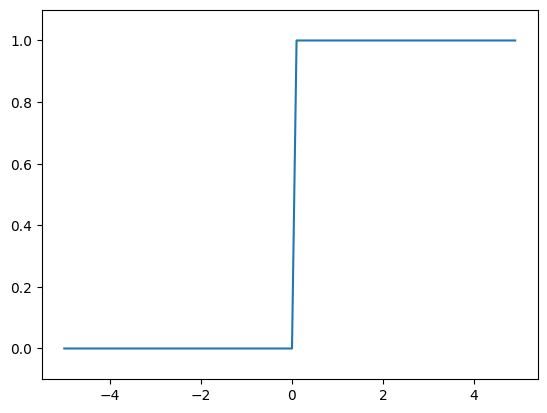

In [31]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int8)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

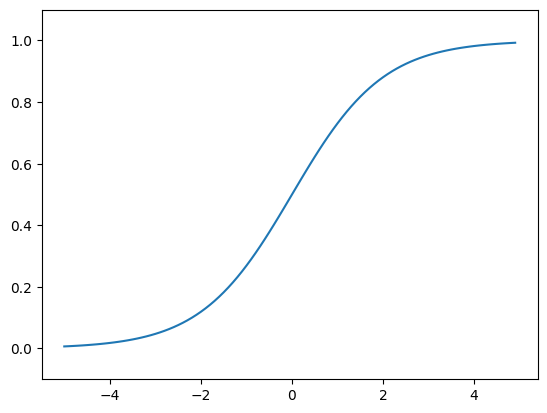

In [32]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### 3.2.5 sigmoid函数和阶跃函数的比较

* sigmoid函数的平滑性对神经网络的学习具有重要意义
* 感知机中神经元之间流动的是0或1的二元信号，神经网络中流动的连续的实数值信号。
* 形状相似，取值范围一致。
* 两者都属于非线性函数。

### 3.2.6 非线性函数

神经网络的激活函数必须使用非线性函数。因为多个线性函数的组合总能使用一个线性函数来表示，加深曾经网络依然可以用另一个一层神经网络来表示，加深的意义就不存在了。

$$ 设h(x) = cx, y(x)=h(h(h(x))) = c^3x, 若 a =c^3 则 y(x) = ax. $$

为了发挥叠加层所带来的优势，激活函数必须使用非线性函数。

### 3.2.7 ReLU函数

在神经网络发展的历史上，sigmoid函数早就开始使用了，而最近则主要使用ReLU(Rectified Liner Unit)函数。
$$
h(x) = 
\begin{cases}
x & (x \gt 0) \\
0 & (x \le 0)
\end{cases}
\qquad \qquad \qquad (3.7) 
$$

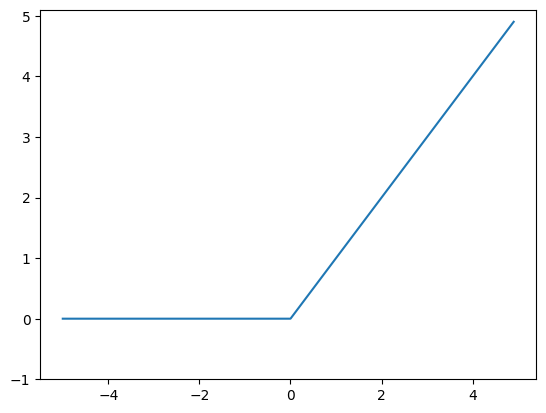

In [33]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.1) # 指定y轴的范围
plt.show()

## 3.3 多维数组的运算

### 3.3.1 多维数组

In [34]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

print('_____________________')

B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[1 2 3 4]
1
(4,)
4
_____________________
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 矩阵乘法

In [35]:
import numpy as np

print('======= 2x2 dot 2x2 = 2x2 =======')
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
print(np.dot(A,B))

print('====== 2x3 dot 3x2 = 2x2 =======')

C = np.array([[1,2,3],[4,5,6]])
print(C.shape)
D = np.array([[1,2],[3,4],[5,6]])
print(D.shape)
print(np.dot(C,D))

print('====== 3x2 dot 2x1 = 3x1 ======') 

E = np.array([[1,2],[3,4],[5,6]])
print(E.shape)
F = np.array([7,8])
print(F.shape)
print(np.dot(E,F))

======= 2x2 dot 2x2 = 2x2 =======
(2, 2)
(2, 2)
[[19 22]
 [43 50]]
====== 2x3 dot 3x2 = 2x2 =======
(2, 3)
(3, 2)
[[22 28]
 [49 64]]
====== 3x2 dot 2x1 = 3x1 ======
(3, 2)
(2,)
[23 53 83]


### 3.3.3 神经网络的内积

In [36]:
import numpy as np

X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W.shape)

Y = np.dot(X,W)
print(Y)
print(Y.shape)

(2,)
(2, 3)
[ 5 11 17]
(3,)


## 3.4 3层神经网络的实现

$$
a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2+b_1^{(1)} \qquad \qquad (3.8) 
$$

$$
    \mathbf{A}^{(1)} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)} \qquad \qquad \qquad \quad (3.9)
$$

In [37]:
import numpy as np

X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

print(A1)

Z1 = sigmoid(A1)
print(Z1)

print("translate from 1 to 2")

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
translate from 1 to 2


## 3.5 输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。机器学习的问题大致可以分为分类问题和回归问题。分类问题是数据属于哪一个类别的问题。而回归问题是根据某个输入预测一个连续的数值的问题。


### 3.5.1 恒等函数和softmax函数

恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。

分类问题中使用的softmax函数可以用下面的式（3.10）表示。

$$
y_k = \frac{e^{a_k}}{\sum_{i=1}^ne^{a_i}} \qquad \qquad \qquad (3.10)
$$

In [38]:
import numpy as np

a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

sump_exp_a = np.sum(exp_a)
print(sump_exp_a)

y = exp_a / sump_exp_a
print(y)

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/ sump_exp_a

    return y

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


### 实现softmax函数时的注意事项

In [39]:
import numpy as np

a = np.array([1010,1000,990])
print(np.exp(a)/np.sum(np.exp(a))) # 没有正确计算

c = np.max(a)
print(a - c )

d = np.exp(a - c )/np.sum(np.exp(a - c))
print(d)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15292\166046848.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a))) # 没有正确计算
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15292\166046848.py:4: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a)/np.sum(np.exp(a))) # 没有正确计算


### 3.5.3 softmax函数的特征

In [40]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

### 3.5.4 输出层的神经元数量

输出层的神经元数量需要根据待解决的问题来决定。对于分类问题，输出层的神经元数量一般设定为类别的数量。

## 3.6 手写数字识别

### 3.6.1 MNIST数据集

5
(784,)
(28, 28)


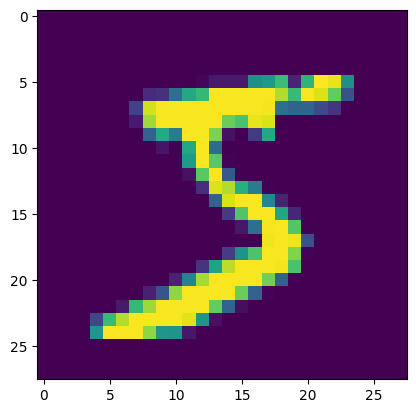

In [41]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint(img))
    pil_img.show()

(x_train,t_train),(x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

plt.imshow(img)
plt.show()
# img_show(img)

### 3.6.2 神经网络的推理处理

In [44]:
import pickle
import numpy as np

def get_data():
    (x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))
    

Accuracy:0.9352


### 3.6.3 批处理

In [49]:
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'], network['W2'], network['W3']
print(x.shape)

print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [50]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352
